In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.15.0'

# Hello, Tensorflow!

In [3]:
hello = tf.constant("Hello, Tensorflow!")

sess = tf.Session() # start tf session

print(sess.run(hello))

b'Hello, Tensorflow!'


In [5]:
x = tf.constant(99, name = 'x')
y = tf.Variable(x + 20, name = 'y')

# 변수 초기화
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

119


In [8]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'score')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x_train * W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    
    if step % 200 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 3.6269462 [0.15756832] [-0.09103607]
200 0.0030052348 [0.9363299] [0.14473702]
400 0.0011475434 [0.9606558] [0.0894387]
600 0.00043818975 [0.9756877] [0.05526763]
800 0.00016732143 [0.9849765] [0.03415198]
1000 6.38922e-05 [0.9907164] [0.02110391]
1200 2.4396597e-05 [0.9942633] [0.01304086]
1400 9.315808e-06 [0.996455] [0.00805852]
1600 3.5573055e-06 [0.99780947] [0.00497967]
1800 1.3584267e-06 [0.9986463] [0.00307724]
2000 5.1884103e-07 [0.9991634] [0.00190169]


In [14]:
S = tf.Variable(tf.random_normal([1]), name = 'score')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

hypothesis = X * S + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict = {X: [1, 2, 3], Y: [1, 2, 3]})
    
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)

0 0.43201566 [1.412326] [0.42104226]
200 0.005738411 [1.412326] [0.19952197]
400 0.0021912097 [1.412326] [0.12329248]
600 0.00083671 [1.412326] [0.07618717]
800 0.00031949618 [1.412326] [0.04707903]
1000 0.000121999175 [1.412326] [0.02909198]
1200 4.6584344e-05 [1.412326] [0.01797698]
1400 1.7788716e-05 [1.412326] [0.01110881]
1600 6.7926917e-06 [1.412326] [0.0068646]
1800 2.5937322e-06 [1.412326] [0.00424195]
2000 9.906771e-07 [1.412326] [0.00262141]


In [16]:
# Test model
print(sess.run(hypothesis, feed_dict = {X: [5]}))

[4.9968557]


# 비용함수 그래프

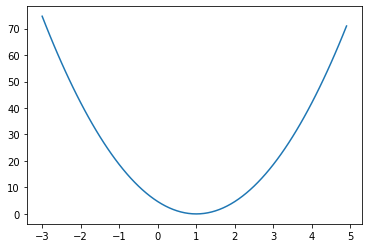

In [18]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

# Gradient descent

In [21]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_sum(tf.square(hypothesis - Y))

# derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run(W))

0 15.706568 [-0.05919671]
1 4.467646 [0.43509507]
2 1.2707973 [0.69871736]
3 0.36147106 [0.83931595]
4 0.10281855 [0.9143018]
5 0.029246092 [0.9542943]
6 0.008318919 [0.9756236]
7 0.0023662644 [0.9869993]
8 0.0006730787 [0.99306625]
9 0.0001914546 [0.996302]
10 5.4457934e-05 [0.99802774]
11 1.548886e-05 [0.99894816]
12 4.406077e-06 [0.999439]
13 1.2534173e-06 [0.9997008]
14 3.564959e-07 [0.99984044]
15 1.0142492e-07 [0.9999149]
16 2.8912567e-08 [0.9999546]
17 8.181317e-09 [0.9999758]
18 2.3467415e-09 [0.99998707]
19 6.692744e-10 [0.9999931]
20 1.8856383e-10 [0.9999963]


In [25]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

gradient = tf.reduce_mean((W * X - Y) * X) * 2

gvs = optimizer.compute_gradients(cost, [W])
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    if step % 10 == 0:
        print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
20 [5.260776, 1.5636545, [(5.260776, 1.5636545)]]
30 [1.9748148, 1.2115873, [(1.9748147, 1.2115873)]]
40 [0.7413151, 1.0794266, [(0.7413151, 1.0794266)]]
50 [0.27827826, 1.0298156, [(0.2782783, 1.0298156)]]
60 [0.10446167, 1.0111923, [(0.10446167, 1.0111923)]]
70 [0.03921318, 1.0042014, [(0.03921318, 1.0042014)]]
80 [0.014720838, 1.0015773, [(0.014720838, 1.0015773)]]
90 [0.005525271, 1.000592, [(0.0055252714, 1.000592)]]


In [27]:
x1_data = [77., 84., 99., 94., 83.]
x2_data = [86., 79., 93., 90., 71.]
x3_data = [73., 84., 96., 81., 76.]
y_data = [164., 198., 157., 173., 182.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = 'score1')
w2 = tf.Variable(tf.random_normal([1]), name = 'score2')
w3 = tf.Variable(tf.random_normal([1]), name = 'score3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict = {x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    
    if step % 200 == 0:
        print(step, "COST: ", cost_val, "\nPREDICTION\n", hy_val)

0 COST:  119749.71 
PREDICTION
 [-163.92798 -162.21783 -191.16573 -184.44514 -153.36331]
200 COST:  608.6481 
PREDICTION
 [156.21582 173.20241 200.03894 175.82584 159.47467]
400 COST:  608.18317 
PREDICTION
 [155.94875 173.24278 200.08333 175.81667 159.6602 ]
600 COST:  607.79626 
PREDICTION
 [155.71123 173.27367 200.11961 175.81535 159.82661]
800 COST:  607.47107 
PREDICTION
 [155.49974 173.29642 200.1489  175.8207  159.97614]
1000 COST:  607.1952 
PREDICTION
 [155.31126 173.3122  200.17216 175.83168 160.11073]
1200 COST:  606.9583 
PREDICTION
 [155.14305 173.32196 200.19016 175.84734 160.23206]
1400 COST:  606.753 
PREDICTION
 [154.99275 173.32663 200.20366 175.86693 160.34166]
1600 COST:  606.57294 
PREDICTION
 [154.85826 173.32695 200.21327 175.88971 160.44086]
1800 COST:  606.41345 
PREDICTION
 [154.73778 173.3236  200.21954 175.91513 160.5308 ]
2000 COST:  606.2711 
PREDICTION
 [154.62964 173.31715 200.22298 175.94266 160.61253]


In [40]:
x_data = [[77., 84., 99.], [94., 83., 86.], [79., 93., 90.],
          [71., 73., 84.], [96., 81., 76.]]
y_data = [[164.], [198.], [157.], [173.], [182.]]

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'score')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
          
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict = {X: x_data, Y: y_data})
    
    if step % 200 == 0:
        print(step, "COST: ", cost_val, "\nPREDICTION\n", hy_val)

0 COST:  10700.066 
PREDICTION
 [[62.080982]
 [88.255165]
 [55.74226 ]
 [60.375523]
 [91.82511 ]]
200 COST:  106.16471 
PREDICTION
 [[169.84303]
 [193.80444]
 [162.35092]
 [154.17613]
 [191.80354]]
400 COST:  99.307304 
PREDICTION
 [[171.23405]
 [193.19322]
 [162.36111]
 [154.99431]
 [190.25551]]
600 COST:  95.37016 
PREDICTION
 [[172.17207]
 [192.87039]
 [162.1839 ]
 [155.57071]
 [189.28712]]
800 COST:  92.72324 
PREDICTION
 [[172.82504]
 [192.7218 ]
 [161.90384]
 [155.99295]
 [188.67743]]
1000 COST:  90.72129 
PREDICTION
 [[173.29686]
 [192.67723]
 [161.57208]
 [156.31541]
 [188.28996]]
1200 COST:  89.09835 
PREDICTION
 [[173.65215]
 [192.69359]
 [161.2195 ]
 [156.572  ]
 [188.04042]]
1400 COST:  87.734924 
PREDICTION
 [[173.93108]
 [192.74449]
 [160.8643 ]
 [156.78398]
 [187.87672]]
1600 COST:  86.570114 
PREDICTION
 [[174.15866]
 [192.81393]
 [160.51706]
 [156.96466]
 [187.76672]]
1800 COST:  85.567505 
PREDICTION
 [[174.35075]
 [192.8921 ]
 [160.18358]
 [157.12257]
 [187.69043]]
2

### adjust learning rate

In [42]:
x_data = [[77., 84., 99.], [94., 83., 86.], [79., 93., 90.],
          [71., 73., 84.], [96., 81., 76.]]
y_data = [[164.], [198.], [157.], [173.], [182.]]

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'score')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1.0)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
          
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict = {X: x_data, Y: y_data})
    
    if step % 200 == 0:
        print(step, "COST: ", cost_val, "\nPREDICTION\n", hy_val)

0 COST:  49637.55 
PREDICTION
 [[-53.404346]
 [-48.519722]
 [-46.625946]
 [-45.879276]
 [-43.343025]]
200 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
400 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
600 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
800 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1000 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1200 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1400 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1600 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1800 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2000 COST:  nan 
PREDICTION
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [43]:
x_data = [[77., 84., 99.], [94., 83., 86.], [79., 93., 90.],
          [71., 73., 84.], [96., 81., 76.]]
y_data = [[164.], [198.], [157.], [173.], [182.]]

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'score')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-10)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
          
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict = {X: x_data, Y: y_data})
    
    if step % 200 == 0:
        print(step, "COST: ", cost_val, "\nPREDICTION\n", hy_val)

0 COST:  58320.305 
PREDICTION
 [[-68.935104]
 [-57.647236]
 [-92.480835]
 [-57.0184  ]
 [-56.407444]]
200 COST:  58220.15 
PREDICTION
 [[-68.72197 ]
 [-57.432003]
 [-92.2663  ]
 [-56.831573]
 [-56.200546]]
400 COST:  58120.082 
PREDICTION
 [[-68.50886 ]
 [-57.216743]
 [-92.051765]
 [-56.64475 ]
 [-55.99365 ]]
600 COST:  58020.105 
PREDICTION
 [[-68.29573]
 [-57.00151]
 [-91.83724]
 [-56.45791]
 [-55.78675]]
800 COST:  57920.406 
PREDICTION
 [[-68.082985]
 [-56.786724]
 [-91.62309 ]
 [-56.271435]
 [-55.580296]]
1000 COST:  57821.074 
PREDICTION
 [[-67.87077 ]
 [-56.57259 ]
 [-91.4095  ]
 [-56.085457]
 [-55.374542]]
1200 COST:  57721.824 
PREDICTION
 [[-67.65857 ]
 [-56.358475]
 [-91.19591 ]
 [-55.89948 ]
 [-55.16879 ]]
1400 COST:  57622.676 
PREDICTION
 [[-67.446365]
 [-56.144356]
 [-90.982315]
 [-55.7135  ]
 [-54.963036]]
1600 COST:  57523.6 
PREDICTION
 [[-67.23418 ]
 [-55.930218]
 [-90.76875 ]
 [-55.527523]
 [-54.757282]]
1800 COST:  57424.613 
PREDICTION
 [[-67.02196 ]
 [-55.716106

## Logistic regression

In [47]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name = 'score')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict = {X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})

    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.4264284
200 0.52479047
400 0.49168554
600 0.4678478
800 0.44846871
1000 0.4315563
1200 0.4162048
1400 0.40196976
1600 0.38861665
1800 0.3760117
2000 0.36407188
2200 0.3527402
2400 0.34197342
2600 0.33173582
2800 0.32199642
3000 0.31272683
3200 0.30390045
3400 0.295493
3600 0.28748083
3800 0.2798416
4000 0.27255446
4200 0.2655993
4400 0.25895756
4600 0.25261143
4800 0.24654417
5000 0.24074014
5200 0.23518454
5400 0.22986346
5600 0.22476397
5800 0.2198739
6000 0.21518172
6200 0.21067666
6400 0.20634878
6600 0.20218855
6800 0.19818711
7000 0.19433622
7200 0.19062807
7400 0.18705541
7600 0.18361121
7800 0.18028934
8000 0.17708349
8200 0.17398816
8400 0.17099784
8600 0.16810757
8800 0.16531268
9000 0.16260873
9200 0.15999135
9400 0.15745674
9600 0.15500112
9800 0.15262099
10000 0.15031296

Hypothesis:  [[0.03108484]
 [0.15931079]
 [0.3065129 ]
 [0.78063196]
 [0.93910134]
 [0.9800101 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0
